In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load Evaluation Results ===
eval_results_path = "retrieval_evaluation_results.csv"  # Update if needed
eval_df = pd.read_csv(eval_results_path)

# Round all float columns to 4 decimal places
eval_df = eval_df.round(4)

eval_df.iloc[:,[0,11]]

,Query_ID,F1-Score
0,AILA_Q1,0.0000
1,AILA_Q2,0.2857
2,AILA_Q3,0.0000
3,AILA_Q4,0.0000
4,AILA_Q5,0.2000
5,AILA_Q6,0.0000
6,AILA_Q7,0.0000
7,AILA_Q8,0.0000
8,AILA_Q9,0.0000
9,AILA_Q10,0.0000


In [17]:
# === Display Summary Statistics ===
print("📊 Summary Statistics:")
eval_df.describe().round(4)

📊 Summary Statistics:


,Precision@1,Precision@3,Precision@5,Recall@1,Recall@3,Recall@5,MRR,nDCG@3,nDCG@5,MAP,F1-Score
count,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000,50.0000
mean,0.2200,0.1600,0.1520,0.0916,0.1591,0.2284,0.2890,0.2078,0.2320,0.1696,0.1617
std,0.4185,0.2714,0.2043,0.2283,0.3176,0.3322,0.4043,0.3578,0.3364,0.3109,0.2135
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.0000,0.3333,0.2000,0.0000,0.1750,0.4583,0.4583,0.2807,0.3333,0.1250,0.2857
max,1.0000,1.0000,0.8000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7273


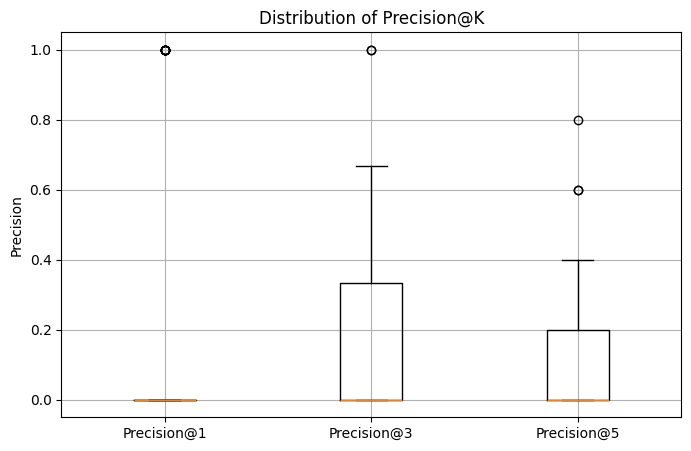

In [4]:

# === Visualization: Precision@K ===
plt.figure(figsize=(8, 5))
plt.boxplot([eval_df["Precision@1"], eval_df["Precision@3"], eval_df["Precision@5"]], 
            tick_labels=["Precision@1", "Precision@3", "Precision@5"])
plt.title("Distribution of Precision@K")
plt.ylabel("Precision")
plt.grid(True)
plt.show()

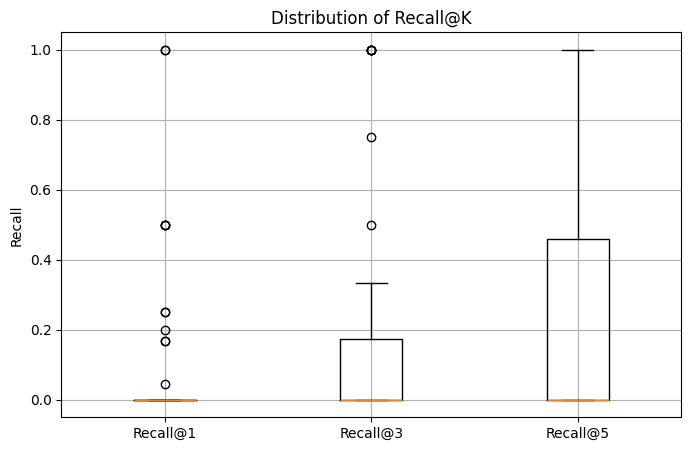

In [6]:

# === Visualization: Recall@K ===
plt.figure(figsize=(8, 5))
plt.boxplot([eval_df["Recall@1"], eval_df["Recall@3"], eval_df["Recall@5"]], 
            tick_labels=["Recall@1", "Recall@3", "Recall@5"])
plt.title("Distribution of Recall@K")
plt.ylabel("Recall")
plt.grid(True)
plt.show()

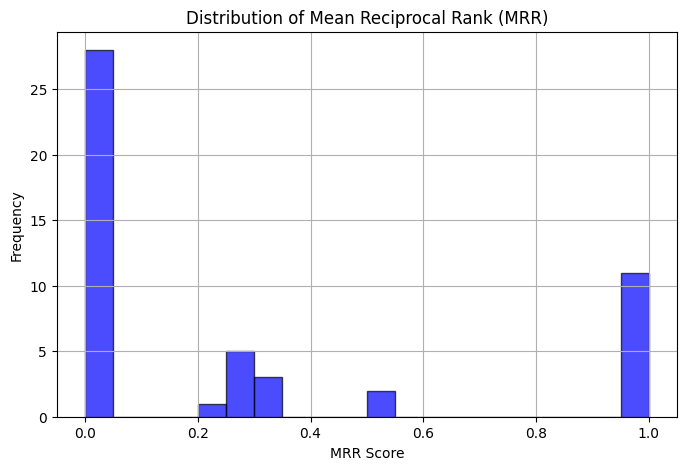

In [7]:

# === Visualization: Mean Reciprocal Rank (MRR) ===
plt.figure(figsize=(8, 5))
plt.hist(eval_df["MRR"], bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title("Distribution of Mean Reciprocal Rank (MRR)")
plt.xlabel("MRR Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

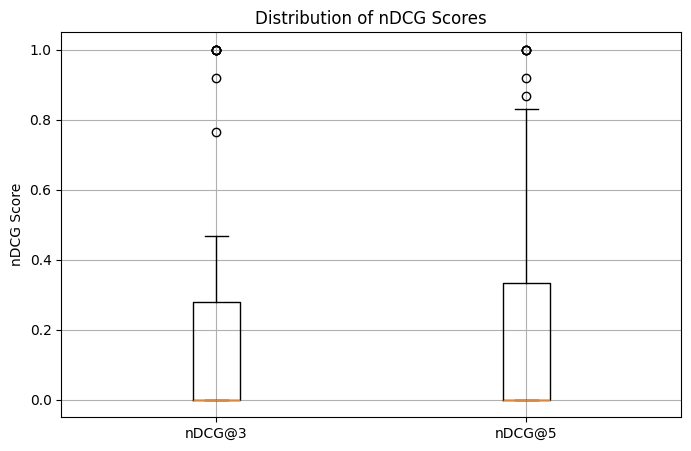

In [9]:
# === Visualization: nDCG@K ===
plt.figure(figsize=(8, 5))
plt.boxplot([eval_df["nDCG@3"], eval_df["nDCG@5"]], 
            tick_labels=["nDCG@3", "nDCG@5"])
plt.title("Distribution of nDCG Scores")
plt.ylabel("nDCG Score")
plt.grid(True)
plt.show()

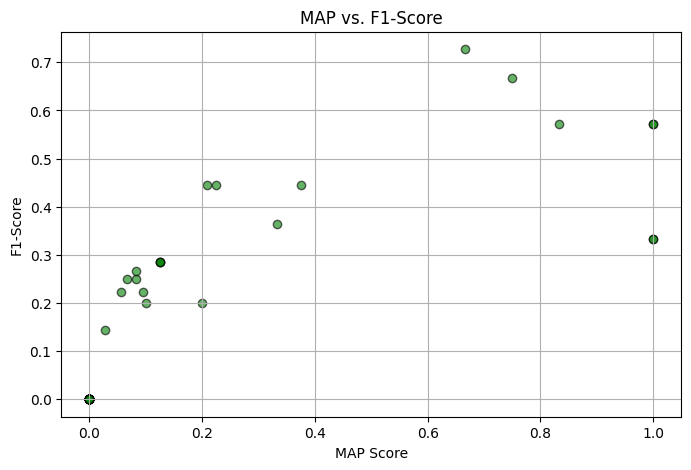

In [10]:
# === Visualization: MAP vs. F1-Score Scatter Plot ===
plt.figure(figsize=(8, 5))
plt.scatter(eval_df["MAP"], eval_df["F1-Score"], alpha=0.6, color='green', edgecolor='black')
plt.title("MAP vs. F1-Score")
plt.xlabel("MAP Score")
plt.ylabel("F1-Score")
plt.grid(True)
plt.show()

In [20]:
# Get Query_IDs where Precision@1 is 1
perfect_queries = eval_df[eval_df['Precision@1'] == 1]['Query_ID']
print("\nQueries with Perfect Precision@1:")
print(len(perfect_queries.tolist()))


Queries with Perfect Precision@1:
11


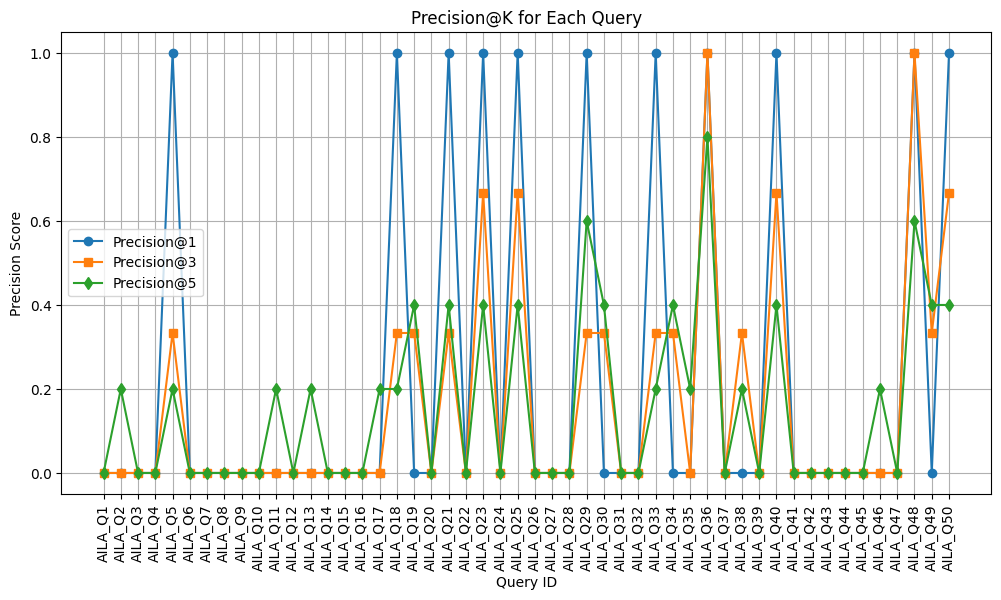

In [23]:
 # Line plot of Precision for each query
plt.figure(figsize=(12, 6))
plt.plot(eval_df["Query_ID"], eval_df["Precision@1"], marker='o', linestyle='-', label="Precision@1")
plt.plot(eval_df["Query_ID"], eval_df["Precision@3"], marker='s', linestyle='-', label="Precision@3")
plt.plot(eval_df["Query_ID"], eval_df["Precision@5"], marker='d', linestyle='-', label="Precision@5")
plt.xticks(rotation=90)  # Rotate query labels for readability
plt.xlabel("Query ID")
plt.ylabel("Precision Score")
plt.title("Precision@K for Each Query")
plt.legend()
plt.grid(True)
plt.show()

/var/folders/58/qp4mm7q567760kp4v8ln0pvw0000gn/T/ipykernel_44767/2748157013.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


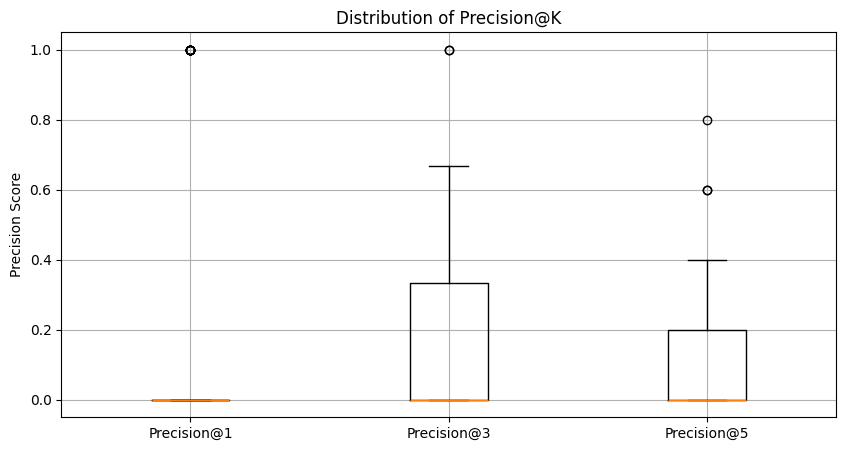

In [24]:
# Boxplot for Precision@K values
plt.figure(figsize=(10, 5))
plt.boxplot(
    [eval_df["Precision@1"], eval_df["Precision@3"], eval_df["Precision@5"]],
    labels=["Precision@1", "Precision@3", "Precision@5"]
)
plt.title("Distribution of Precision@K")
plt.ylabel("Precision Score")
plt.grid(True)
plt.show()

In [43]:
# 4. Correlation Matrix
corr_matrix = eval_df.drop('Query_ID', axis=1).corr()
corr_matrix

,Precision@1,Precision@3,Precision@5,Recall@1,Recall@3,Recall@5,MRR,nDCG@3,nDCG@5,MAP,F1-Score
Precision@1,1.000000,0.821868,0.699040,0.763061,0.818202,0.744987,0.943430,0.927808,0.889581,0.845165,0.737138
Precision@3,0.821868,1.000000,0.877582,0.535989,0.786859,0.741455,0.871935,0.916776,0.863275,0.794613,0.888663
Precision@5,0.699040,0.877582,1.000000,0.359458,0.582556,0.703726,0.838536,0.758619,0.813508,0.632367,0.917119
Recall@1,0.763061,0.535989,0.359458,1.000000,0.901406,0.801924,0.719895,0.820802,0.818085,0.900655,0.541559
Recall@3,0.818202,0.786859,0.582556,0.901406,1.000000,0.905822,0.817959,0.940493,0.924477,0.985729,0.766484
Recall@5,0.744987,0.741455,0.703726,0.801924,0.905822,1.000000,0.831755,0.861698,0.942760,0.940088,0.896830
MRR,0.943430,0.871935,0.838536,0.719895,0.817959,0.831755,1.000000,0.934008,0.943690,0.846854,0.866502
nDCG@3,0.927808,0.916776,0.758619,0.820802,0.940493,0.861698,0.934008,1.000000,0.963207,0.948083,0.839953
nDCG@5,0.889581,0.863275,0.813508,0.818085,0.924477,0.942760,0.943690,0.963207,1.000000,0.953079,0.902345
MAP,0.845165,0.794613,0.632367,0.900655,0.985729,0.940088,0.846854,0.948083,0.953079,1.000000,0.813067
